# Training

In [ ]:
!python main.py --mode train --num_domains 2 --w_hpf 0 \
               --resume_iter 50000 \
               --lambda_reg 1 --lambda_sty 1 --lambda_ds 2 --lambda_cyc 1 \
               --train_img_dir data/apis/train \
               --val_img_dir data/apis/val

In [171]:
!python main.py --mode test --num_domains 2 --w_hpf 0 \
               --resume_iter 100000 \
               --train_img_dir data/apis/train \
               --val_img_dir data/apis/val2 \
               --checkpoint_dir expr/checkpoints/apis \
               --eval_dir expr/eval/apis \
               --val_batch_size 899

GG <class 'argparse.Namespace'>
Namespace(img_size=256, num_domains=2, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1, lambda_sty=1, lambda_ds=1, ds_iter=100000, w_hpf=0.0, randcrop_prob=0.5, total_iters=100000, resume_iter=100000, batch_size=8, val_batch_size=899, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='test', num_workers=0, seed=777, train_img_dir='data/apis/train', val_img_dir='data/apis/val2', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints/apis', eval_dir='expr/eval/apis', result_dir='expr/results', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='assets/representative/custom/female', out_dir='assets/representative/celeba_hq/src/female', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=10, sample_every=10000, save_every=10000, eval_every=150000)
Number of parameters of generator: 338929

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import nibabel as nib
import numpy as np
import os

In [2]:
from pathlib import Path
from itertools import chain
import random
from munch import Munch
from PIL import Image
import torch
from torch.utils import data
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [ ]:
valpath_ncct = "data/apis/val/ncct/"
valpath_adc = "data/apis/val/adc/"
mylist_ncct = os.listdir(valpath_ncct)
mylist_ncct.sort()
print(len(mylist_ncct))
mylist_adc = os.listdir(valpath_adc)
mylist_adc.sort()
print(len(mylist_adc))

In [ ]:
s = 10
img_ncct = np.array(Image.open(os.path.join(valpath_ncct,mylist_ncct[s])).convert('RGB'))
img_adc = np.array(Image.open(os.path.join(valpath_adc,mylist_adc[s])).convert('RGB'))
img_ncct = torch.from_numpy(img_ncct)
img_adc = torch.from_numpy(img_adc)
print(type(img_ncct), type(img_adc))
plt.subplot(1,2,1)
plt.imshow(img_ncct, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_adc, cmap="gray")
plt.show()

In [7]:
!ls /data/gustavogarzon/backup/stargan-v2/data//data/gustavogarzon/backup/stargan-v2/data/apis

LICENSE  README.md  core  download.sh  main.py	training.ipynb
NOTICE	 assets     data  expr	       metrics


# Test 01

In [54]:
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import ImageFolder

class ImageFolderWithPaths(ImageFolder):
    def __getitem__(self, index):
        img, label = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        return img, label, path

def get_test2_loader(root, img_size=256, batch_size=32,
                    shuffle=True, num_workers=4):
    print('Preparing DataLoader for the generation phase...')
    transform = transforms.Compose([
        transforms.Resize([img_size, img_size]),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.5, 0.5, 0.5],
        #                      std=[0.5, 0.5, 0.5]),
    ])

    dataset = ImageFolderWithPaths(root, transform)
    return data.DataLoader(dataset=dataset,
                           batch_size=batch_size,
                           shuffle=shuffle,
                           num_workers=num_workers,
                           pin_memory=True)

dataloader = get_test2_loader("/data/gustavogarzon/backup/stargan-v2/data/apis/val/", shuffle=False, num_workers=0, batch_size=1798)

Preparing DataLoader for the generation phase...


In [55]:
iter_ = iter(dataloader)
sample = next(iter_)
x, y, path = sample

In [57]:
path

('/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_001.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_002.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_003.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_004.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_005.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_006.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_007.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_008.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_009.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_010.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_011.png',
 '/data/gustavogarzon/backup/stargan-v2/data/apis/val/adc/test_000_adc_012.png',
 '/data/gustavogarzon/backup

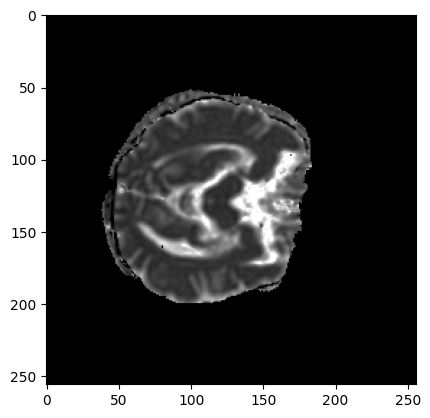

In [50]:
import matplotlib.pyplot as plt


plt.imshow(x[10].numpy().transpose(1, 2, 0))

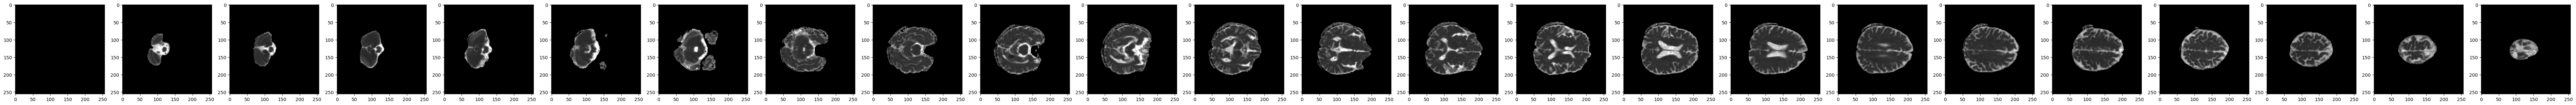

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=24, figsize=(100, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(x[i].numpy().transpose(1, 2, 0))

In [52]:
y

tensor([0, 0, 0,  ..., 1, 1, 1])

In [53]:
len(y)

1798

# SSIM

In [ ]:
myssim = np.array([
    
])

In [ ]:
np.mean(myssim), np.std(myssim)